In [49]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

# Load Data
data = pd.read_csv('output.csv')

# Create Binary Target
data['target'] = (data['temperature'] > 2).astype(int)

# Features & Target
X = data[['temperature', 'humidity', 'vibration', 'pressure']]
y = data['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save Scaler
joblib.dump(scaler, 'scaler.pkl')

# Build Neural Network Model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(4,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary Output
])

# Compile & Train Neural Network
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_nn = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Save Neural Network Model
model.save('model.h5')
print("Neural network model saved.")

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM Model
lstm_model = keras.Sequential([
    layers.LSTM(16, activation='relu', return_sequences=True, input_shape=(1, 4)),  # (timesteps, features)
    layers.LSTM(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary Output
])

# Compile & Train LSTM
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

# Save LSTM Model
lstm_model.save('lstm_model.h5')
print("LSTM model saved.")

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Neural Network Model
y_pred_nn = (model.predict(X_test) > 0.5).astype(int).flatten()
print("\nNeural Network Classification Report:\n", classification_report(y_test, y_pred_nn))
print("\nNeural Network Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# Evaluate LSTM Model
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).flatten()
print("\nLSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))
print("\nLSTM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lstm))

# Evaluate Random Forest Model
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Epoch 1/50


C:\Jupyter\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4896 - loss: 0.7404  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5104 - loss: 0.7248 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4479 - loss: 0.7394 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4896 - loss: 0.7155 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 0.7129 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4688 - loss: 0.7222 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4896 - loss: 0.7066 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5208 - loss: 0.7017 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5312 - loss: 0.6899 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5729 - loss: 0.6865 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.6755 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 0.6715 
Epoch 13/50

Neural network model saved.


C:\Jupyter\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6875 - loss: 0.6908
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6771 - loss: 0.6903 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.6904 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7292 - loss: 0.6896 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7292 - loss: 0.6890 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7500 - loss: 0.6886 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7500 - loss: 0.6886 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7604 - loss: 0.6878 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8021 - loss: 0.6872 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8125 - loss: 0.6870 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8125 - loss: 0.6867 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8125 - loss: 0.6863 
Ep

LSTM model saved.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.50      1.00      0.67         5

    accuracy                           0.69        16
   macro avg       0.75      0.77      0.69        16
weighted avg       0.84      0.69      0.69        16


Neural Network Confusion Matrix:
 [[6 5]
 [0 5]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step

LSTM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         5

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


LSTM Confusion Matrix:
 [[11  0]
 [ 0  5]]

Random Forest Classification Report:
               precision    recall  f1-score   su

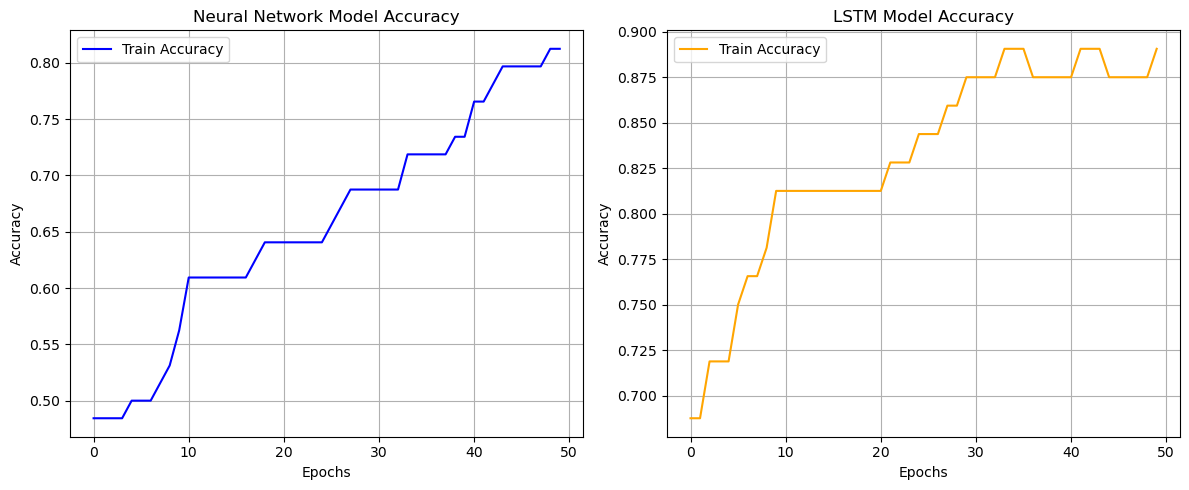

In [59]:

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Plot for Neural Network
plt.subplot(1, 2, 1)
plt.plot(history_nn.history['accuracy'], label='Train Accuracy', color='blue')
plt.title('Neural Network Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

# Plot for LSTM
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy', color='orange')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Random Forest model saved.


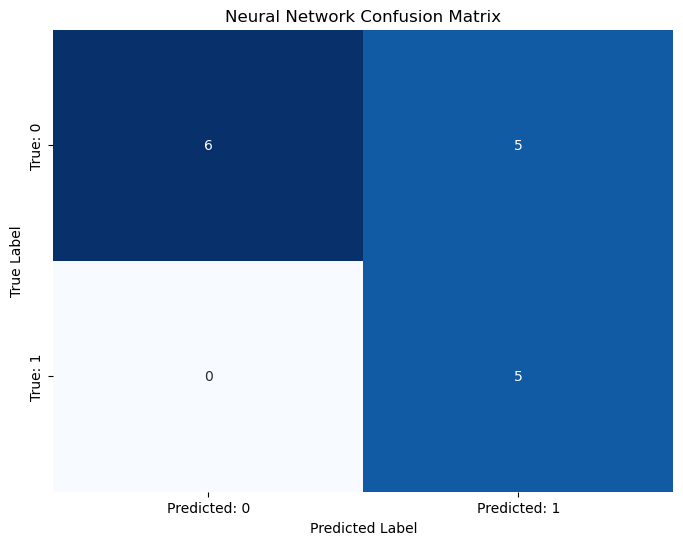

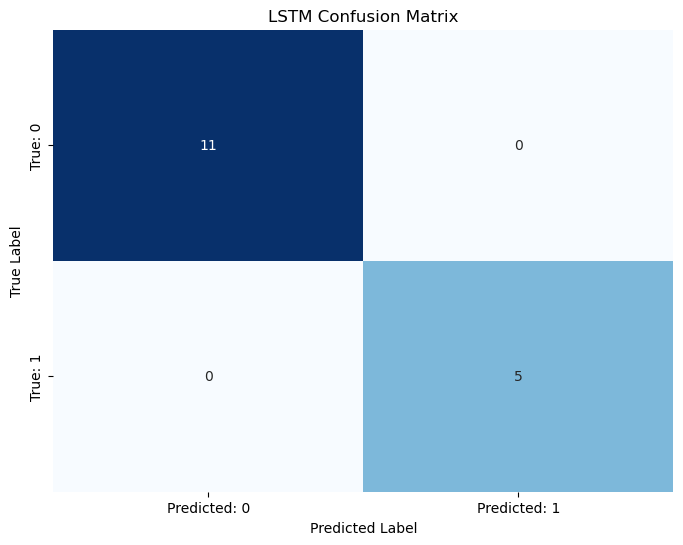

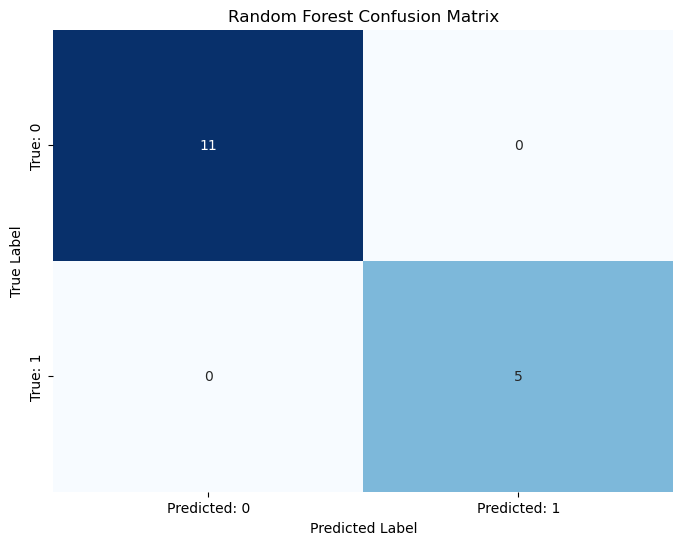

In [57]:

# Save Random Forest Model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Random Forest model saved.")

# Confusion Matrix Visualization
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted: 0', 'Predicted: 1'],
                yticklabels=['True: 0', 'True: 1'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices
cm_nn = confusion_matrix(y_test, y_pred_nn)
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plot_confusion_matrix(cm_nn, title='Neural Network Confusion Matrix')
plot_confusion_matrix(cm_lstm, title='LSTM Confusion Matrix')
plot_confusion_matrix(cm_rf, title='Random Forest Confusion Matrix')


C:\Users\AM'sTUFFa15\AppData\Local\Temp\ipykernel_10236\102404682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


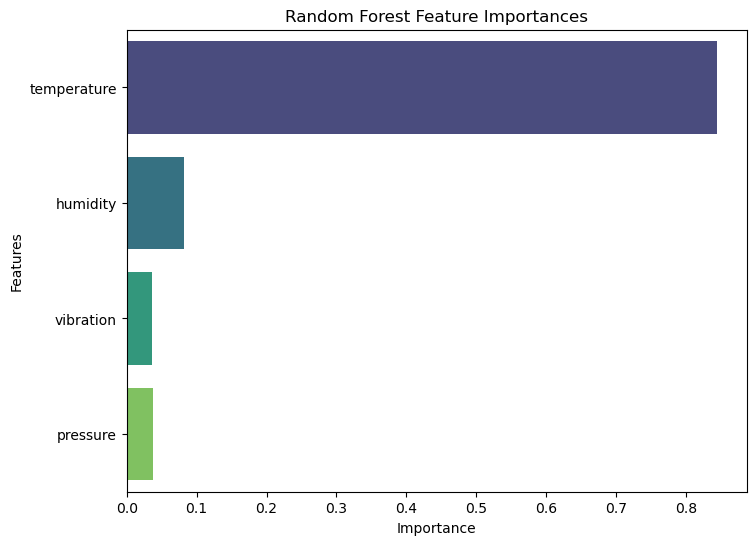

In [53]:

# Plotting Feature Importances for Random Forest
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [63]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.animation as animation

# Load Data
data = pd.read_csv('output.csv')

# Create Binary Target
data['target'] = (data['temperature'] > 2).astype(int)

# Features & Target
X = data[['temperature', 'humidity', 'vibration', 'pressure']]
y = data['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Neural Network Model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(4,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary Output
])

# Compile & Train Neural Network
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_nn = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM Model
lstm_model = keras.Sequential([
    layers.LSTM(16, activation='relu', return_sequences=True, input_shape=(1, 4)),
    layers.LSTM(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary Output
])

# Compile & Train LSTM
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Models
y_pred_nn = (model.predict(X_test) > 0.5).astype(int).flatten()
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).flatten()
y_pred_rf = rf_model.predict(X_test)


Epoch 1/50


C:\Jupyter\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7917 - loss: 0.5738
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.5674 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8125 - loss: 0.5533 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8021 - loss: 0.5587 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8021 - loss: 0.5476 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8021 - loss: 0.5328
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7917 - loss: 0.5306 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7708 - loss: 0.5417 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7812 - loss: 0.5305 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.5173 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8021 - loss: 0.5201 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8021 - loss: 0.5089 
Epoch 13/50
2

C:\Jupyter\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5000 - loss: 0.6945
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5417 - loss: 0.6938 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5208 - loss: 0.6939 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4896 - loss: 0.6939 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.6931 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5104 - loss: 0.6926 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4792 - loss: 0.6928 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5208 - loss: 0.6916 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 0.6914 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4688 - loss: 0.6921 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 0.6907 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5208 - loss: 0.6904 
Epoch 13/50
2

C:\Jupyter\New folder\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


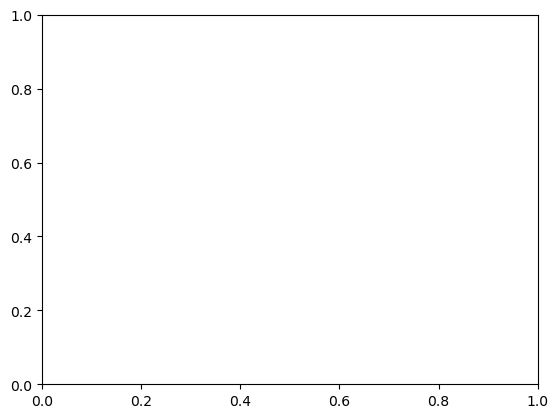

In [69]:
# Create a Real-Time Updating Graph
fig, ax = plt.subplots()
xdata = []
ydata = []

def update(frame):
    # Simulate real-time data update
    new_fixed_data = np.random.random()  # Replace with your actual metric (e.g., accuracy over time)
    ydata.append(new_fixed_data)
    xdata.append(frame)

    ax.clear()
    ax.plot(xdata, ydata, color='blue', label='Model Performance')
    ax.set_title('Real-Time Model Performance')
    ax.set_xlabel('Updates')
    ax.set_ylabel('Random Metric')  # Replace with your actual metric name
    ax.legend()
    ax.set_ylim(0, 1)  # Adjust based on your metric expectations
    plt.grid()

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, 100), interval=100)

plt.show()